#Q2

In [77]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Input, AveragePooling2D, Dropout

In [16]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [17]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

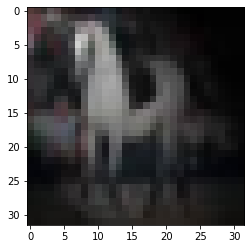

In [18]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [19]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [20]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(Flatten())
fc_model.add(Dense(128, activation='relu'))
fc_model.add(Dense(32, activation='relu'))
fc_model.add(Dense(10, activation='softmax'))
fc_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________


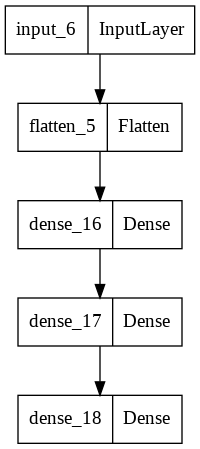

In [21]:
plot_model(fc_model)

In [22]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(Conv2D(32, (3, 3), activation='relu'))
Conv_model.add(Conv2D(64, (3, 3), activation='relu'))
Conv_model.add(MaxPooling2D((2, 2)))
Conv_model.add(Conv2D(128, (3, 3), activation='relu'))
Conv_model.add(MaxPooling2D((2, 2)))
Conv_model.add(Conv2D(64, (3, 3), activation='relu'))
Conv_model.add(MaxPooling2D((4, 4)))
Conv_model.add(Flatten())
Conv_model.add(Dense(256, activation='relu'))
Conv_model.add(Dense(10, activation='softmax'))
Conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)         

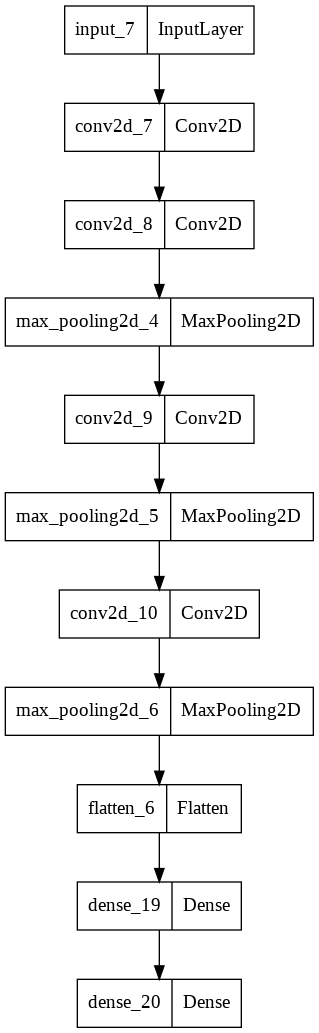

In [23]:
plot_model(Conv_model)

In [24]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0417 - accuracy: 0.2310
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8266 - accuracy: 0.3327
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7334 - accuracy: 0.3732
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6857 - accuracy: 0.3900
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6495 - accuracy: 0.4022


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 3ms/step - loss: 1.6263 - accuracy: 0.4147


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6218 - accuracy: 0.3951
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1887 - accuracy: 0.5735
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0251 - accuracy: 0.6356
Epoch 4/5
1563/1563 [===

#Q3

In [25]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [26]:
!rm -r sample_data

In [27]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:09<00:00, 59.0MB/s]


In [28]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [33]:
from PIL import Image, ImageOps

In [29]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [51]:
def resize_img(img, desired_size = 224):
    # write your code here
    w, h = img.shape[:2]
    r = float(desired_size)/max(w, h)
    h2, w2 = tuple([int(x * r) for x in (w, h)])
    img = cv2.resize(img, (w2, h2))
    dw = desired_size - w2
    left, right = dw//2, dw - (dw//2)
    dh = desired_size - h2
    top, bottom = dh//2, dh - (dh//2)
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    return new_img

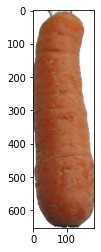

In [49]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

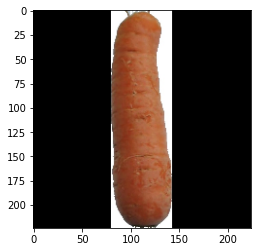

In [52]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [53]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [65]:
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

In [54]:
# YOU CAN CHANGE IT
EPOCHS = 30

In [66]:
resnet = tf.keras.models.Sequential()
# Write your code here
added_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=None,
    classes=24,
)
resnet.add(added_model)
resnet.add(Flatten())
resnet.add(Dense(24, activation='softmax'))
resnet.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 100352)            0         
                                                                 
 dense_21 (Dense)            (None, 24)                2408472   
                                                                 
Total params: 25,996,184
Trainable params: 25,943,064
Non-trainable params: 53,120
_________________________________________________________________


In [67]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [68]:
resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 75s 1s/step - loss: 10.0237 - acc: 0.4258


## C : Fine-tune Resnet50 on fruits dataset.

In [92]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
added_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    classes=24,
)
fine_tune_resnet.add(added_model)
fine_tune_resnet.add(Flatten())
fine_tune_resnet.add(Dense(256, activation='relu'))
fine_tune_resnet.add(Dense(128, activation='relu'))
fine_tune_resnet.add(Dense(24, activation='softmax'))
added_model.trainable = False
fine_tune_resnet.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_14 (Flatten)        (None, 100352)            0         
                                                                 
 dense_37 (Dense)            (None, 256)               25690368  
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 24)                3096      
                                                                 
Total params: 49,314,072
Trainable params: 25,726,360
Non-trainable params: 23,587,712
_________________________________________________________________


In [93]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [95]:
fine_tune_resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 35s 535ms/step - loss: 0.8006 - acc: 0.8063


## Test models

In [96]:
resnet.evaluate(test_generator)

33/33 [==============================] - 19s 538ms/step - loss: 4.1548 - acc: 0.1617


[4.154778480529785, 0.16173633933067322]

In [97]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 18s 517ms/step - loss: 0.5990 - acc: 0.8309


[0.5989599227905273, 0.8308681845664978]